# Car Price Prediction

## Data Preprocessing

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data?select=car+data.csv

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load data

dataset = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv')
dataset.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for column in ['Price', 'Year', 'Kilometer','Length','Width','Height', 'Seating Capacity', 'Fuel Tank Capacity']:
    plt.figure(figsize = (6, 6))
    sns.displot(dataset[column])
    plt.title(f'{column} distribution')
    plt.show()

In [ ]:
# Count Plot for catagorical data

for column in ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain']:
    plt.figure(figsize = (12,6))
    sns.countplot(x = column, data = dataset)
    plt.title(f'{column} count plot')
    plt.show()

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
for column in ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain']:
    dataset[column] = encoder.fit_transform(dataset[column])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   int64  
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int64  
 6   Transmission        2059 non-null   int64  
 7   Location            2059 non-null   int64  
 8   Color               2059 non-null   int64  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   int64  
 12  Max Power           2059 non-null   int64  
 13  Max Torque          2059 non-null   int64  
 14  Drivetrain          2059 non-null   int64  
 15  Length              1995 non-null   float64
 16  Width 

## Correlation

In [15]:
dataset.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Max Power               0
Max Torque              0
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [16]:
dataset['Length'].value_counts()

Length
3995.0    221
4440.0     70
4270.0     57
3985.0     55
4456.0     44
         ... 
4371.0      1
5399.0      1
4969.0      1
3884.0      1
4249.0      1
Name: count, Length: 248, dtype: int64

In [19]:
dataset['Length'].fillna(dataset['Length'].mode()[0], inplace = True)
dataset['Width'].fillna(dataset['Width'].mode()[0], inplace = True)
dataset['Seating Capacity'].fillna(dataset['Seating Capacity'].mode()[0], inplace = True)
dataset['Fuel Tank Capacity'].fillna(dataset['Fuel Tank Capacity'].mode()[0], inplace = True)
dataset['Height'].fillna(dataset['Height'].mode()[0], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   int64  
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int64  
 6   Transmission        2059 non-null   int64  
 7   Location            2059 non-null   int64  
 8   Color               2059 non-null   int64  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   int64  
 12  Max Power           2059 non-null   int64  
 13  Max Torque          2059 non-null   int64  
 14  Drivetrain          2059 non-null   int64  
 15  Length              2059 non-null   float64
 16  Width 

## Correlation

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

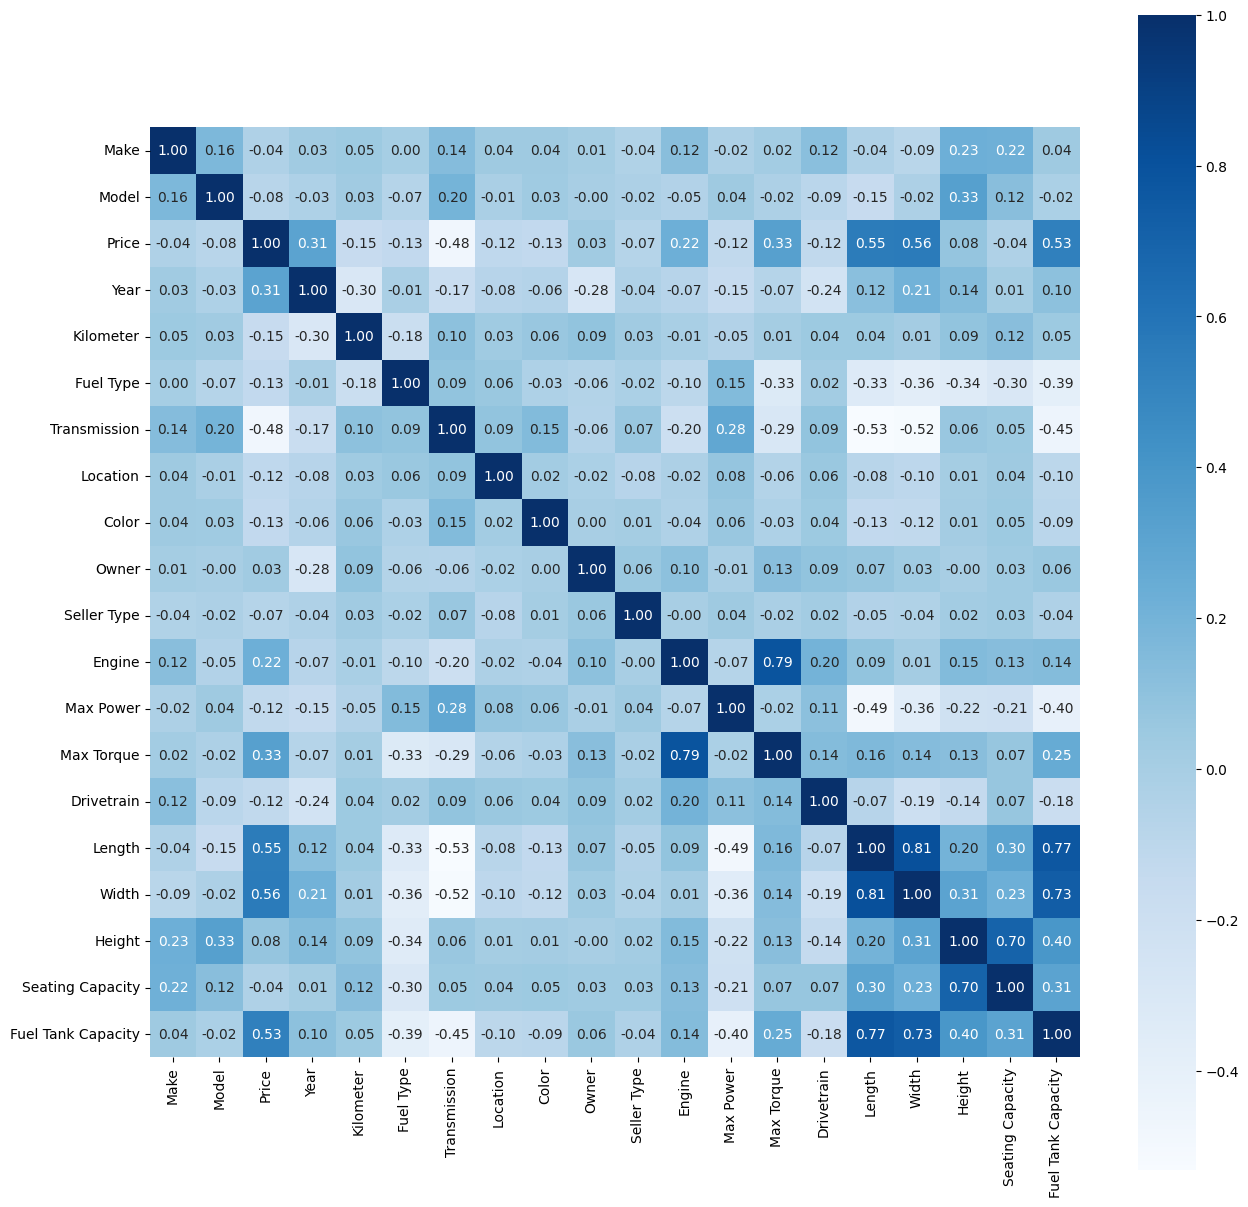

In [21]:
corr = dataset.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cmap = 'Blues', annot = True, square = True, fmt = '.2f')
plt.show()

In [22]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2

In [23]:
X = dataset.drop('Price', axis = 1)
y = dataset['Price']

In [29]:
best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(X, y)


In [30]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis = 1)
feature_scores.columns = ['Specs', 'Scores']
feature_scores

,Specs,Scores
0,Make,3.861481e+03
1,Model,1.198600e+05
2,Year,6.463874e+00
3,Kilometer,2.070171e+07
4,Fuel Type,8.525727e+02
5,Transmission,5.849450e+02
6,Location,7.243407e+03
7,Color,1.958763e+03
8,Owner,4.419460e+02
9,Seller Type,1.383744e+01


In [32]:
print(feature_scores.nlargest(10, 'Scores'))

                 Specs        Scores
3            Kilometer  2.070171e+07
1                Model  1.198600e+05
14              Length  6.442820e+04
11           Max Power  6.175647e+04
12          Max Torque  5.499941e+04
10              Engine  2.113336e+04
15               Width  1.517625e+04
16              Height  9.458806e+03
6             Location  7.243407e+03
18  Fuel Tank Capacity  6.032242e+03


In [35]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


ExtraTreesClassifier()

In [36]:
model.feature_importances_

array([0.03124101, 0.09665641, 0.11029235, 0.15075289, 0.01507028,
       0.00936143, 0.12974212, 0.10068535, 0.03610199, 0.00907411,
       0.03487455, 0.04557617, 0.04264348, 0.01491631, 0.04495916,
       0.03983303, 0.04161643, 0.01214781, 0.03445512])

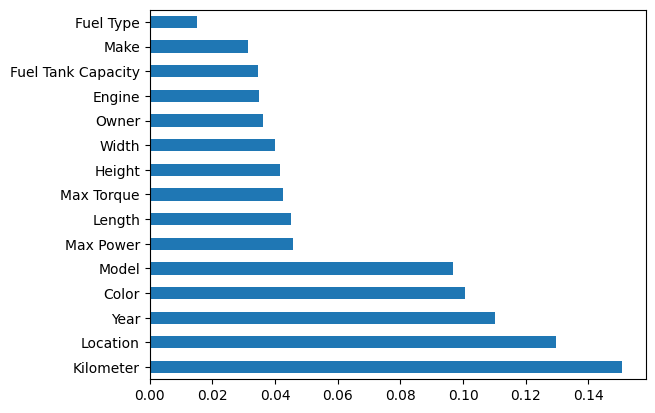

In [70]:
feature_importances= pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(15).plot(kind = 'barh')
plt.show()

In [71]:
columns = feature_importances.nlargest(15).index.to_list()
columns

['Kilometer',
 'Location',
 'Year',
 'Color',
 'Model',
 'Max Power',
 'Length',
 'Max Torque',
 'Height',
 'Width',
 'Owner',
 'Engine',
 'Fuel Tank Capacity',
 'Make',
 'Fuel Type']

In [77]:
columns = ['Fuel Tank Capacity', 'Width', 'Height', 'Max Torque', 'Engine', 'Transmission', 'Year' ]

In [78]:
X_ = X[columns]
X_.head()

,Fuel Tank Capacity,Width,Height,Max Torque,Engine,Transmission,Year
0,35.0,1680.0,1505.0,5,7,1,2017
1,42.0,1695.0,1555.0,77,9,1,2014
2,35.0,1595.0,1550.0,11,6,1,2011
3,37.0,1745.0,1510.0,15,6,1,2019
4,55.0,1830.0,1795.0,167,60,1,2018


In [79]:
X_.shape

(2059, 7)

In [80]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(1647, 7) (412, 7)


In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import r2_score

r2_score(y_test, lr.predict(X_test))

0.4273947801135244